# STAT 345: Nonparametric Statistics

## Lesson 09.1: The Chi-Squared Goodness-of-Fit Test

**Reading: Conover Section 4.5**

*Prof. John T. Whelan*

Thursday 27 March 2024

These lecture slides are in a computational notebook.  You have access to them through http://vmware.rit.edu/

Flat HTML and slideshow versions are also in MyCourses.

The notebook can run Python commands (other notebooks can use R or Julia; "Ju-Pyt-R").  Think: computational data analysis, not "coding".

Standard commands to activate inline interface and import libraries:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

## Types of Data (See Section 2.1 of Conover)

Haven't talked much about data & measurement scales, but now is a good time, since Chapter 4 is mostly about categorical data.  Types of data (from most to least specific):

-   **Numerical** or **Cardinal Data**: numbers. If $x$ and $x'$ are two data values, their difference $x-x'$ is meaningful. Could also divide into *interval scale* (only $x-x'$ meaningful) & *ratio scale* (both $x-x'$ and $x/x'$ meaningful).  E.g., time of day is an interval scale; 11:00-10:15=45 minutes, but 11:00/10:15 doesn't mean anything.  (See also: ${}^{\circ}$C or ${}^{\circ}$F.)

-   **Ordinal Data**: can say whether $x>x'$, but the value of $x-x'$ is not meaningful. Most rank-based
    methods can operate on ordinal data, while most parametric methods
    ($t$-tests, ANOVA, etc) require at least an interval scale.

-   **Categorical Data**: not inherently
    numerical, e.g., eye color, hair color, political party
    registration, etc. Can say whether $x=x'$ or $x\ne x'$, but no meaningful ordering.  Could label categories with numbers, but their ordering of is basically arbitrary. Note that 1 to 9 in a Sudoku puzzle are actually categorical.

## The Chi-squared Goodness-of-fit Test

- Consider categorical data $\{x_I|1,\ldots,N\}$ w/$c$ categories $\{{\mathcal{C}}_i|i=1,\ldots,c\}$.

- $H_0$ gives probabilities
$\{p^*_i|i=1,\ldots,c\}$ for an observation to fall each
category, i.e.,
$P({\color{royalblue}{X}}{\mathbin{=}}{\mathcal{C}}_i|H_0)=p^*_i$. For
consistency, the probabilities must satisfy $\sum_{i=1}^cp^*_i=1$.

- Don't work w/original data, but make inference from # of observations
$O_i$ in each category, $$O_i = \sum_{I=1}^N I[x_I={\mathcal{C}}_i]\qquad\hbox{where}\qquad \sum_{i=1}^c O_i = N$$

- If we think of these
$\{{\color{royalblue}{O_i}}\}$ as a random vector, the corresponding
probability distribution is the multinomial distribution, a
generalization of the binomial distribution $$
  p(\{O_i\}|N,\{p_i\})
  = \frac{N!}{O_1!O_2!\cdots O_c!} p_1^{O_1}p_2^{O_2}\cdots p_c^{O_c};\quad
  O_i = 0,1,2,\ldots;\quad O_1+\cdots+O_c=N$$

- Vector of observations $\{{\color{royalblue}{O_i}}\}$ in categories is a multinomial random vector
$$p(\{O_i\}|N,\{p_i\})
  = \frac{N!}{O_1!O_2!\cdots O_c!} p_1^{O_1}p_2^{O_2}\cdots p_c^{O_c};\quad
  O_i = 0,1,2,\ldots;\quad O_1+\cdots+O_c=N$$

- Each one
of these $c$ random variables is a binomial $\operatorname{Bin}(N,p_i)$
with
$$E({\color{royalblue}{O_i}})=Np_i \qquad \hbox{and} \qquad V({\color{royalblue}{O_i}}) = Np_i(1-p_i)$$
but of course they are not independent, since there is a constraint
$\sum_{i=1}^c {\color{royalblue}{O_i}} = N$, So if we know
the values of $O_1$, $O_2$, …, $O_{c-1}$, then $O_c$ is determined.

- The null hypothesis specifies expected number counts of $E_i=Np^*_i$ for each category, which satisfy $\sum_{i=1}^c E_i=N$.

- Note that in general
the $\{E_i\}$ will not be integers, although the $\{O_i\}$ are by
definition.

Want to know if the observed $\{O_i\}$ are consistent w/expected $\{E_i\}$ counts.  If the sample size is large enough to use normal approximation, can
write a $\chi^2$ statistic, as with the Kruskal-Wallis
or Friedman test.

As a reminder, this is in analogy with the following
two cases:

1.  For independent normal random variables
    ${\color{royalblue}{X_i}}\sim N(\mu_i,\sigma_i^2)$,
    $$\sum_{i=1}^n \left(\frac{{\color{royalblue}{X_i}}-\mu_i}{\sigma_i}\right)^2
        \sim \chi^2(n)$$

2.  For a random sample $\{{\color{royalblue}{X_i}}\}$ from
    $N(\mu,\sigma^2)$, if
    ${\color{royalblue}{Y_i}}={\color{royalblue}{X_i}}-{\color{royalblue}{{{\overline{X}}}}}$ (constraint
    $\sum_{i=1}^n {\color{royalblue}{Y_i}}=0$)
    $$\sum_{i=1}^n \left(\frac{{\color{royalblue}{X_i}}-{\color{royalblue}{{{\overline{X}}}}}}{\sigma}\right)^2
        = \sum_{i=1}^n \left(\frac{{\color{royalblue}{Y_i}}-0}{\sigma}\right)^2
        \sim \chi^2(n-1)$$

- Rigorously, invert variance-covariance matrix $\operatorname{Cov}({\color{royalblue}{O_i}},{\color{royalblue}{O_j}})$ to get the approx $\chi^2$ statistic.

- Can motivate the form using the case $c=2$. Then the multinomial
distribution is really a binomial, w/$p_1=p$ and
$p_2=1-p$, and the rv
${\color{royalblue}{O_2}}=N-{\color{royalblue}{O_1}}$ is redundant with
${\color{royalblue}{O_1}}\sim\operatorname{Bin}(N,p_1)$.

- Apply the normal approximation to $\color{royalblue}{O_1}$ & get chi-squared statistic
$$\color{royalblue}{W} = \frac{(\color{royalblue}{O_1}-Np^*_1)^2}{Np^*_1(1-p^*_1)}
  = \frac{(\color{royalblue}{O_1}-Np^*_1)^2}{Np^*_1p^*_2}=\frac{(\color{royalblue}{O_1}-Np^*_1)^2}{Np^*_1} + \frac{(\color{royalblue}{O_1}-Np^*_1)^2}{Np^*_2}$$
where we've used $\frac{1}{p^*_1} + \frac{1}{p^*_2} = \frac{p^*_2+p^*_1}{p^*_1p^*_2}
  = \frac{1}{p^*_1p^*_2}$

- Using $E_i=Np_i^*$, we get $\color{royalblue}{W} = \frac{(\color{royalblue}{O_1}-E_1)^2}{E_1} + \frac{(\color{royalblue}{O_1}-E_1)^2}{E_2}$

 - To treat the categories symmetrically, remember that $\color{royalblue}{O_1}+\color{royalblue}{O_2}=N=E_1+E_2$, so $\color{royalblue}{O_1}-E_1 = -(\color{royalblue}{O_2}-E_2)$ and $\color{royalblue}{W} = \frac{(\color{royalblue}{O_1}-E_1)^2}{E_1} + \frac{(\color{royalblue}{O_2}-E_2)^2}{E_2}$
which is approximately chi-squared distributed with $1=2-1$ degree of
freedom when $H_0$ is true.

- Turns out to extend to larger numbers of categories, and the
normal approximation gives us
$${\color{royalblue}{W}} = \sum_{i=1}^c \frac{({\color{royalblue}{O_i}}-E_i)^2}{E_i} \sim\chi^2(c-1)
  \qquad \hbox{if $H_0$ true}$$

- Expanding the square gives a “shortcut
formula” $$\begin{split}
    {\color{royalblue}{W}} = \sum_{i=1}^c \frac{{\color{royalblue}{O_i}}^2-2E_i{\color{royalblue}{O_i}}+E_i^2}{E_i}
    = \sum_{i=1}^c \left(\frac{{\color{royalblue}{O_i}}^2}{E_i} - 2{\color{royalblue}{O_i}} + E_i\right)
   \\ = \sum_{i=1}^c\frac{{\color{royalblue}{O_i}}^2}{E_i} - 2N + N = \sum_{i=1}^c\frac{{\color{royalblue}{O_i}}^2}{E_i} - N
  \end{split}$$

- Note that although this is nominally simpler, involving
fewer operations, it could actually be less convenient if $E_i$ and
$O_i$ are both large, since it involves squaring larger numbers. (In
principle, this could also run the risk of roundoff error.)

#### Example: Twins

Consider 50 sets of twins. If they are all fraternal, and male and female offspring
are equally likely, we'd expect on average 12.5 male-male pairs, 25 mixed
pairs, and 12.5 female-female pairs.
Suppose we actually saw 8 male-male, 23 mixed, and 19 female-female pairs:

|       |   MM     | mixed   |    FF   | 
| :---: | :------: | :-----: | :-----: |
|  observed  |   $$8$$    |  $$23$$   |   $$19$$  |
|  expected  |  $$12.5$$  |  $$25$$   |  $$12.5$$ |

In [3]:
O_i = np.array([8,23,19]); N = np.sum(O_i); pstar_i = np.array([0.25,0.5,0.25]); E_i = N*pstar_i; N, E_i

(50, array([12.5, 25. , 12.5]))

We can calculate
$$W = \frac{(8-12.5)^2}{12.5} + \frac{(23-25)^2}{25}
  + \frac{(19-12.5)^2}{12.5}
  = 5.16$$

In [4]:
W = np.sum((O_i-E_i)**2/E_i); W, stats.chi2(df=2).sf(W)

(5.16, 0.07577400402284548)

The $p$-value, using $\chi^2(3-1)$, is $0.076$.

### Testing with Unknown Parameters

- Sometimes the null hypothesis doesn’t uniquely specify the $\{p^*_i\}$, but includes some unknown parameters ${{\boldsymbol{\theta}}}\equiv\{\theta_1,\ldots,\theta_m\}$.

- E.g., in the twin example, if the probability of a male offspring is $\theta$, the probabilities $\{p_i(\theta)\}$ are $\theta^2$, $2\theta(1-\theta)$, and $(1-\theta)^2$ for MM, mixed and FF pairs.  

- In this case we estimate the parameters $\boldsymbol{\hat{\theta}}$ using the observed data.
The
best guess expected counts
$\{\hat{E}_i=Np^*_i(\boldsymbol{\hat{\theta}})\}$ are then used to
construct the goodness-of-fit statistic
$${\color{royalblue}{\hat{W}}} = \sum_{i=1}^c \frac{({\color{royalblue}{O_i}}-{\color{royalblue}{\hat{E}_i}})^2}{{\color{royalblue}{\hat{E}_i}}}$$
where now the expected counts $\{{\color{royalblue}{\hat{E}_i}}\}$ also
depend on the data.

- If we have fit $m$ parameters in this way, we would
ideally expect the null distribution of $\color{royalblue}{\hat{W}}$ to be $\chi^2(c-1-m)$.

Return to the twin example:

|       |   MM     | mixed   |    FF   | 
| :---: | :------: | :-----: | :-----: |
|  observed  |   $$8$$    |  $$23$$   |   $$19$$  |
|  expected  |  $$50\theta^2$$  |  $$100\,\theta(1-\theta)$$   |  $$50(1-\theta)^2$$ |

A good estimate for $\theta$ is $\hat{\theta}=\frac{2O_{\text{MM}}+O_{\text{mixed}}}{2N} = \frac{16+23}{100} = .39$

In [5]:
thetahat = (2*O_i[0]+O_i[1])/(2*N); phat_i = np.array([thetahat**2,2*thetahat*(1-thetahat),(1-thetahat)**2]);thetahat, phat_i

(0.39, array([0.1521, 0.4758, 0.3721]))

In [6]:
Ehat_i = N * phat_i; Ehat_i

array([ 7.605, 23.79 , 18.605])

|       |   MM     | mixed   |    FF   | 
| :---: | :------: | :-----: | :-----: |
|  observed  |   $$8$$    |  $$23$$   |   $$19$$  |
|  expected for $\theta=.39$ | $$7.605$$   |        $$23.790$$ |           $$18.605$$ |


|       |   MM     | mixed   |    FF   | 
| :---: | :------: | :-----: | :-----: |
|  observed  |   $$8$$    |  $$23$$   |   $$19$$  |
|  expected for $\theta=.39$ | $$7.605$$   |        $$23.790$$ |           $$18.605$$ |

The chi-squared is then
$$\hat{W} = \frac{(8-7.605)^2}{7.605} + \frac{(23-23.790)^2}{23.790}
  + \frac{(19-18.605)^2}{18.605}
  \approx .0551$$

In [7]:
What = np.sum((O_i-Ehat_i)**2/Ehat_i); What

0.05513600597635068

Since we fit one parameter, we compute the $p$-value using $\chi^2(3-1-1)=\chi^2(1)$:

In [8]:
stats.chi2(df=1).sf(What)

0.8143557597901158

## Testing a Probability Distribution

One obvious type of categorical data to which the chi-squared test can
be applied is a histogram. Take, for example, Problem 6.1.4 from
Conover, which provided the results of “candling” eggs, listing the
number of rejected eggs by crate as 4, 0, 2, 0, 2, 0, 2, and 0. $H_0$ is that the number of rejected eggs is given by a Poisson
distribution with mean 1.5, and it was tested in that problem using the
Kolmogorov test and found a $p$-value of greater than 20%. We can also
test the hypothesis using the chi-squared test, first collecting the
observations by number of eggs rejected:

In [9]:
x_j = np.array([4, 0, 2, 0, 2, 0, 2, 0]); N = len(x_j); N

8

In [10]:
c = 6; i_i = np.arange(c); i_i

array([0, 1, 2, 3, 4, 5])

In [11]:
O_i = np.sum(x_j[None,:]==i_i[:,None],axis=-1); O_i

array([4, 0, 3, 0, 1, 0])

In [12]:
O_i[-1] = np.sum(x_j>=(c-1)); O_i

array([4, 0, 3, 0, 1, 0])

Note: although the distribution is discrete, make a choice in defining categories; last bin is $x_j\ge 5$. This didn’t matter for the observed number counts, which cut
off at some point, but has an impact on the expected numbers, which we
estimate using the pmf of the Poisson distribution:

In [13]:
pstar_i = stats.poisson(1.5).pmf(i_i); pstar_i

array([0.22313016, 0.33469524, 0.25102143, 0.12551072, 0.04706652,
       0.01411996])

In [14]:
pstar_i[-1] = stats.poisson(1.5).sf(c-1.5); pstar_i, np.sum(pstar_i)

(array([0.22313016, 0.33469524, 0.25102143, 0.12551072, 0.04706652,
        0.01857594]),
 1.0)

In [15]:
E_i = N*pstar_i; E_i

array([1.78504128, 2.67756192, 2.00817144, 1.00408572, 0.37653215,
       0.14860749])

In [16]:
O_i

array([4, 0, 3, 0, 1, 0])

Now we can calculate the test statistic and compare it to a chi-squared
with $6-1=5$ degrees of freedom.

In [17]:
(O_i-E_i)**2/E_i

array([2.74841942, 2.67756192, 0.48986051, 1.00408572, 1.03234789,
       0.14860749])

In [18]:
W = np.sum((O_i-E_i)**2/E_i); W, np.sum(O_i**2/E_i)-N

(8.100882956399715, 8.100882956399715)

In [19]:
stats.chi2(df=c-1).sf(W) 

0.1507627106021614

We find a $p$-value of about 15%, still consistent with the hypothesized
distribtion.

If, on the other hand, we’d been told to expect a Poisson distribution
but not told the mean, we could have estimated it from the observed
data:

In [20]:
np.mean(x_j)

1.25

In [21]:
phatstar_i = stats.poisson(1.25).pmf(i_i); phatstar_i

array([0.2865048 , 0.358131  , 0.22383187, 0.09326328, 0.02914478,
       0.00728619])

In [22]:
phatstar_i[-1] = stats.poisson(1.25).sf(c-1.5); phatstar_i, np.sum(phatstar_i)

(array([0.2865048 , 0.358131  , 0.22383187, 0.09326328, 0.02914478,
        0.00912428]),
 1.0)

In [23]:
Ehat_i = N*phatstar_i; Ehat_i

array([2.29203837, 2.86504797, 1.79065498, 0.74610624, 0.2331582 ,
       0.07299423])

In [24]:
What = np.sum((O_i-Ehat_i)**2/Ehat_i); What

8.295713199797843

In [25]:
What

8.295713199797843

Now, since we’ve used the data to estimate the mean of the distribution,
we should compare the value to a chi-squared with $6-1-1=4$ degrees of
freedom:

In [26]:
stats.chi2(df=c-1-1).sf(What)

0.08132708524626904

The $p$-value is actually lower, 8.1%, but still indicates data
plausibly consistent.

Actually, something is a little odd here, because
the chi-squared value of $8.3$ is slightly *higher* than the $8.1$ we
had with the hypothesized Poisson mean of $1.5$. This is an illustration
of the pitfall in estimating parameters. We can see what value actually
produces the lowest chi-squared:

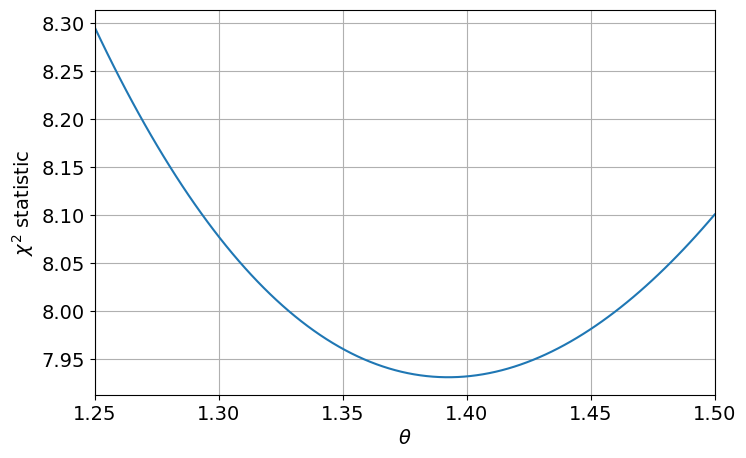

In [27]:
theta_t = np.linspace(1.25,1.5,100); p_ti = stats.poisson(theta_t[:,None]).pmf(i_i[None,:])
p_ti[:,-1] = stats.poisson(theta_t).sf(c-1.5); E_ti = N*p_ti; W_t = np.sum((O_i[None,:]-E_ti)**2/E_ti,axis=-1)
plt.plot(theta_t,W_t);plt.xlabel(r'$\theta$');plt.ylabel(r'$\chi^2$ statistic');plt.grid();plt.xlim(1.25,1.5);

We see that the chi-squared takes on its minimum value of $7.9$ when the
Poisson mean is about $1.39$:

We see that the chi-squared takes on its minimum value of $7.9$ when the
Poisson mean is about $1.39$:

In [28]:
theta_t[np.argmin(W_t)]

1.3914141414141414

In [29]:
Wmin = min(W_t); Wmin

7.931553342466384

In [30]:
stats.chi2(df=c-1-1).sf(Wmin)

0.09411790664431502

The $p$-value is 9.4%, which is still somewhat lower than we had with
the hypothesized Poisson mean. Although the chi-squared is lower, it has
to be compared to a distribution with one fewer degree of freedom. (The
data are still consistent with the null hypothesis in any event.)